In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import sklearn
import pandas_profiling


from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.decomposition import PCA


Using TensorFlow backend.


In [2]:
data = sklearn.datasets.load_wine()
print(data.DESCR)

wineDf = pd.DataFrame(data = data.data
             , columns =  data.feature_names)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
wineDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [4]:
#wineDf['target'] = wineDf['target'].astype(int)
wineDf.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
def normalizeData(x):
    return (x - np.mean(x))/np.std(x)

wineDf = normalizeData(wineDf)

#wineDf.iloc[:,:]=sklearn.preprocessing.Normalizer('l1').fit_transform(wineDf)
wineDf.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [6]:
wineDf['alcohol'].mean()

7.94370811327303e-15

In [7]:
wineDf_target = pd.DataFrame(data = keras.utils.to_categorical(data.target)
             , columns =  data.target_names)
wineDf_target.head(5)

,class_0,class_1,class_2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [8]:
model = Sequential()
model.add(Dense(13,input_shape=(13,),activation='relu'))
#model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))
# defining optimizer
sgd = keras.optimizers.SGD(lr=3e-2, momentum=.7, decay=1e-9, nesterov=False)

# defining compiling model
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

#setup early_stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, mode='max', restore_best_weights=True)
history_stop = keras.callbacks.History()



class_0 = 178 (33.33%)
class_1 = 178 (33.33%)
class_2 = 178 (33.33%)


Train:class_0 = 142 (33.33%)
Train:class_1 = 142 (33.33%)
Train:class_2 = 142 (33.33%)


Test:class_0 = 36 (33.33%)
Test:class_1 = 36 (33.33%)
Test:class_2 = 36 (33.33%)


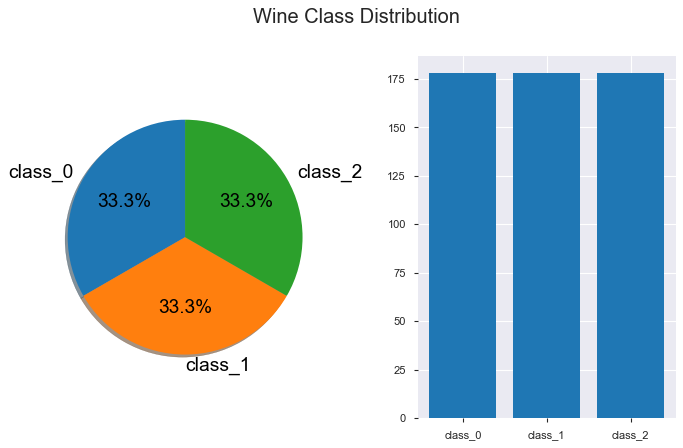

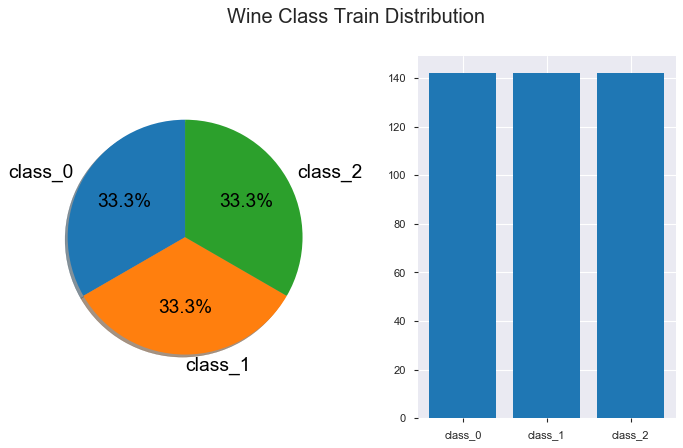

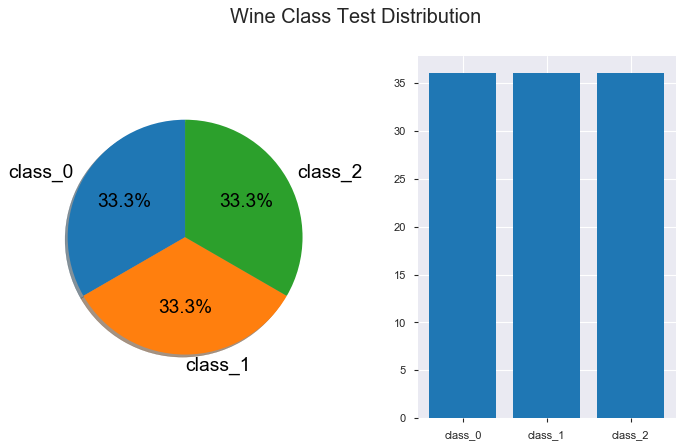

In [9]:
#Class Distribution in the dataset
for name in wineDf_target.columns.tolist():
    print('{0} = {1} ({2:2.2f}%)'.format(name,(wineDf_target[name]==1).count(),((wineDf_target[name]==1).count()/wineDf_target.size)*100))
print('\n')

#Class Distribution in the dataset using pie chart
def dist_class_plot(names, data, title):
    fig1, ax1 = plt.subplots(1, 2, figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
    ax1[0].pie(data, labels=names, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops=dict(color="k",size = "xx-large"))
    ax1[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax1[1].bar(names, data)
    fig1.suptitle(title,fontsize=18)
    plt.subplots_adjust(wspace=0.4)
    return

dist_class_plot(names=wineDf_target.columns.tolist(),
               data=[(wineDf_target[name]==1).count() for name in wineDf_target.columns.tolist()],
               title="Wine Class Distribution")

#TrainSplit data
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(wineDf,wineDf_target,test_size=0.2, random_state=0)

for name in wineDf_target.columns.tolist():
    print('Train:{0} = {1} ({2:2.2f}%)'.format(name,(y_train[name]==1).count(),((y_train[name]==1).count()/y_train.size)*100))
print('\n')

dist_class_plot(names=wineDf_target.columns.tolist(),
                data=[(y_train[name]==1).count() for name in wineDf_target.columns.tolist()],
               title="Wine Class Train Distribution")

for name in wineDf_target.columns.tolist():
    print('Test:{0} = {1} ({2:2.2f}%)'.format(name,(y_test[name]==1).count(),((y_test[name]==1).count()/y_test.size)*100))

dist_class_plot(names=wineDf_target.columns.tolist(),
                data=[(y_test[name]==1).count() for name in wineDf_target.columns.tolist()],
               title="Wine Class Test Distribution")


In [10]:
model_history = model.fit(x_train, y_train, epochs=1000, batch_size=30, validation_data = (x_test,y_test),                       
                       verbose=1, callbacks=[early_stop,history_stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 142 samples, validate on 36 samples
Epoch 1/1000
142/142 [==============================] - 2s 11ms/step - loss: 1.3188 - acc: 0.3451 - val_loss: 1.0142 - val_acc: 0.4167
Epoch 2/1000
142/142 [==============================] - 0s 28us/step - loss: 0.7711 - acc: 0.6338 - val_loss: 0.6149 - val_acc: 0.8333
Epoch 3/1000
142/142 [==============================] - 0s 49us/step - loss: 0.4924 - acc: 0.8732 - val_loss: 0.4327 - val_acc: 0.9444
Epoch 4/1000
142/142 [==============================] - 0s 35us/step - loss: 0.3576 - acc: 0.9014 - val_loss: 0.3300 - val_acc: 0.9444
Epoch 5/1000
142/142 [==============================] - 0s 49us/step - loss: 0.2822 - acc: 0.9366 - val_loss: 0.2671 - val_acc: 0.9722
Epoch 6/1000
142/142 [==============================] - 0s 35us/step - loss: 0.2358 - acc: 0.9366 - val_loss: 0.2236 - val_acc: 0.9722
Epoch 7/1000
142/142 [==============================] - 0s 42us/step - loss: 0.2009 - acc: 0.9577 - val_loss: 0.1925 - val_acc: 0.9722
Epoch 8/10

36/36 [==============================] - 0s 28us/step
Validation accuracy: 100.00%
178/178 [==============================] - 0s 17us/step
Test accuracy: 97.75%


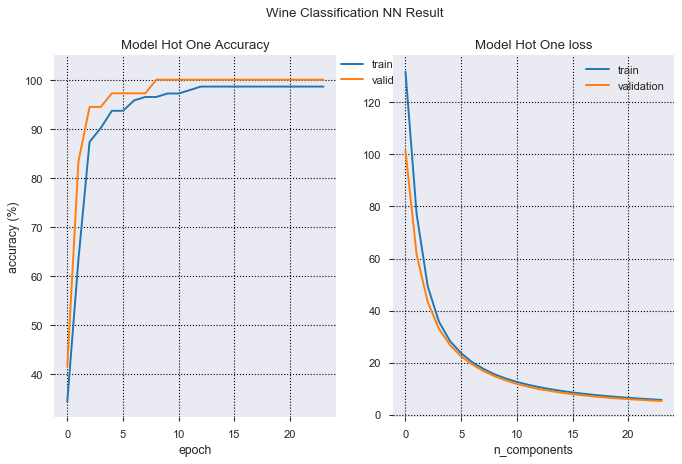

In [11]:
fig2, ax2 = plt.subplots(1, 2, figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k', sharex=True)
fig2.suptitle('Wine Classification NN Result') # or plt.suptitle('Main title')
ax2[0].plot([x*100 for x in model_history.history['acc']])
ax2[0].plot([x*100 for x in model_history.history['val_acc']])
ax2[0].title.set_text('Model Hot One Accuracy')
ax2[0].set_xlabel('epoch')
ax2[0].set_ylabel('accuracy (%)')
ax2[0].set_ylim(top=105)
ax2[0].legend(['train','validation'],bbox_to_anchor=(1.0, 1.),loc='best',borderaxespad=0.)
ax2[0].grid(color='k', linestyle=':', linewidth=1)

ax2[1].plot([x*100 for x in model_history.history['loss']])
ax2[1].plot([x*100 for x in model_history.history['val_loss']])
ax2[1].title.set_text('Model Hot One loss')
ax2[1].set_xlabel('n_components')
ax2[1].legend(['train','validation'],bbox_to_anchor=(1.0, 1.0),loc='best', fancybox=True)
ax2[1].grid(color='k', linestyle=':', linewidth=1)

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Validation accuracy: {:.2f}%'.format(test_acc*100))

all_loss, all_acc = model.evaluate(np.vstack((x_train,x_test)), np.vstack((y_train,y_test)))

print('Test accuracy: {:.2f}%'.format(all_acc*100))

# plot history
#plt.plot([x*100 for x in model_history.history['acc']])
#plt.plot([x*100 for x in model_history.history['val_acc']])
#plt.title('Model Hot One loss')
#plt.xlabel('epoch')
#plt.ylabel('loss')
#plt.ylim(top=105)
#plt.legend(['train','validation'],bbox_to_anchor=(1.0, 1.),loc='best',borderaxespad=0.)
#plt.show()


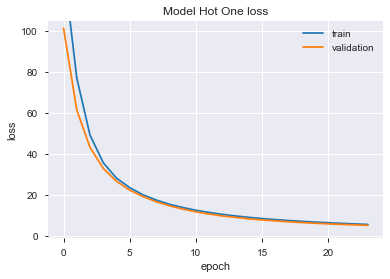

In [12]:
plt.plot([x*100 for x in model_history.history['loss']])
plt.plot([x*100 for x in model_history.history['val_loss']])
plt.title('Model Hot One loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(top=105)
plt.legend(['train','validation'],bbox_to_anchor=(1.0, 1.0),loc='best', fancybox=True)
plt.show()

In [13]:
wineDf.profile_report(title='Wine input data Report')

In [14]:
wineDf_target.profile_report()

In [15]:
 pd.concat([wineDf, wineDf_target], axis = 1).profile_report()

In [16]:
print(np.zeros(wineDf.shape[1]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


[0, 36.2, 55.41, 66.53, 73.6, 80.16, 85.1, 89.34, 92.02, 94.24, 96.17, 97.91, 99.2, 100.0]
PCA Score is 55.41 using 2 components
PCA Score is 73.6 using 4 components
PCA Score is 89.34 using 7 components
PCA Score is 94.24 using 9 components
PCA Score is 96.17 using 10 components


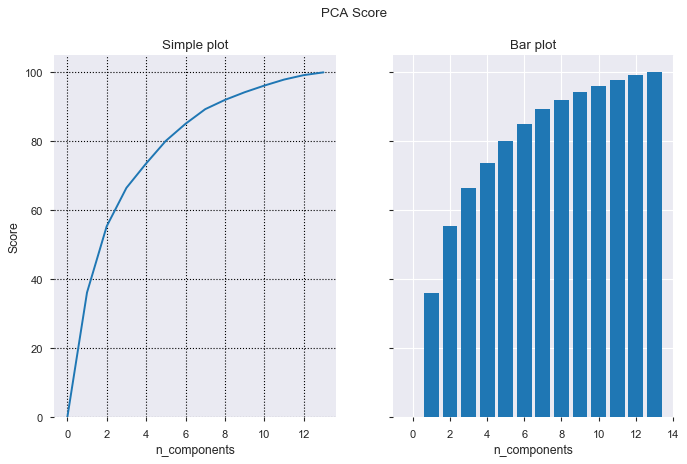

In [17]:
pca = PCA(svd_solver='full', n_components = wineDf.shape[1])
pca.fit(wineDf)

pca_sum_score = [(round(sum(pca.explained_variance_ratio_[0:n])*100,2)) for n in range(pca.n_components+1)]

fig4, ax4 = plt.subplots(1, 2, figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k', sharey=True)
fig4.suptitle('PCA Score') # or plt.suptitle('Main title')
ax4[0].plot(pca_sum_score)
ax4[0].title.set_text('Simple plot')
ax4[0].set_xlabel('n_components')
ax4[0].set_ylabel('Score')
ax4[0].grid(color='k', linestyle=':', linewidth=1)

ax4[1].bar(np.arange(pca.n_components+1),pca_sum_score)
ax4[1].title.set_text('Bar plot')
ax4[1].set_xlabel('n_components')

print(pca_sum_score)

pca_threshold = [50,75,90,95,97]

for threshold in pca_threshold:
    print("PCA Score is {} using {} components".format(min(pca_sum_score, key=lambda x:abs(x-threshold)),pca_sum_score.index(min(pca_sum_score, key=lambda x:abs(x-threshold)))))


In [18]:
wineDf_pca = pd.DataFrame(data=pca.transform(wineDf), columns=wineDf.columns)
wineDf_pca = normalizeData(wineDf_pca)

In [19]:
#Creating model
model_pca = Sequential()
model_pca.add(Dense(13,input_shape=(13,),activation='relu'))
#model.add(Dense(10,activation='relu'))
model_pca.add(Dense(3,activation='softmax'))
# defining optimizer
sgd = keras.optimizers.SGD(lr=3e-2, momentum=.7, decay=1e-9, nesterov=False)

# defining compiling model
model_pca.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

#setup early_stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, mode='max', restore_best_weights=True)
history_stop = keras.callbacks.History()


In [20]:
#TrainSplit data
x_train_pca,x_test_pca,y_train_pca,y_test_pca=sklearn.model_selection.train_test_split(wineDf_pca,wineDf_target,test_size=0.2, random_state=0)

#traning the neural network using pca data
model_history_pca = model_pca.fit(x_train_pca, y_train_pca, epochs=1000, batch_size=30, validation_data = (x_test_pca,y_test_pca),                       
                       verbose=1, callbacks=[early_stop,history_stop])

Train on 142 samples, validate on 36 samples
Epoch 1/1000
142/142 [==============================] - 0s 1ms/step - loss: 1.2144 - acc: 0.3380 - val_loss: 1.3425 - val_acc: 0.4444
Epoch 2/1000
142/142 [==============================] - 0s 35us/step - loss: 1.0797 - acc: 0.4155 - val_loss: 1.1486 - val_acc: 0.5556
Epoch 3/1000
142/142 [==============================] - 0s 42us/step - loss: 0.9523 - acc: 0.5352 - val_loss: 1.0064 - val_acc: 0.6389
Epoch 4/1000
142/142 [==============================] - 0s 28us/step - loss: 0.8560 - acc: 0.6268 - val_loss: 0.9098 - val_acc: 0.7500
Epoch 5/1000
142/142 [==============================] - 0s 42us/step - loss: 0.7673 - acc: 0.6901 - val_loss: 0.8259 - val_acc: 0.8056
Epoch 6/1000
142/142 [==============================] - 0s 35us/step - loss: 0.6938 - acc: 0.7958 - val_loss: 0.7520 - val_acc: 0.8056
Epoch 7/1000
142/142 [==============================] - 0s 42us/step - loss: 0.6217 - acc: 0.8310 - val_loss: 0.6967 - val_acc: 0.8056
Epoch 8/100

36/36 [==============================] - 0s 56us/step
Validation accuracy: 97.22%
178/178 [==============================] - 0s 22us/step
Test accuracy: 99.44%


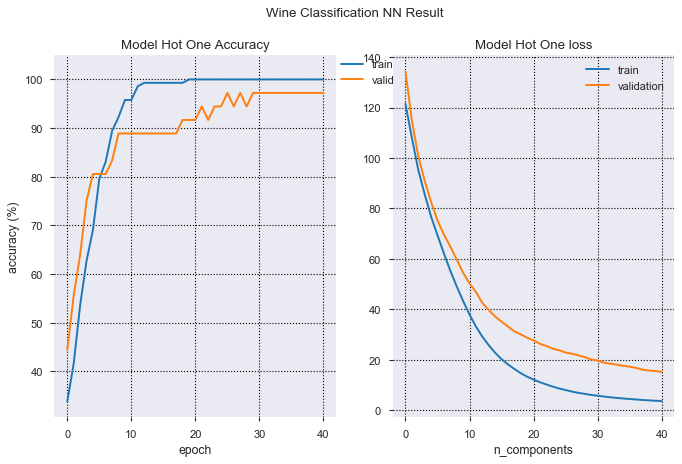

In [21]:
fig2, ax2 = plt.subplots(1, 2, figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k', sharex=True)
fig2.suptitle('Wine Classification NN Result') # or plt.suptitle('Main title')
ax2[0].plot([x*100 for x in model_history_pca.history['acc']])
ax2[0].plot([x*100 for x in model_history_pca.history['val_acc']])
ax2[0].title.set_text('Model Hot One Accuracy')
ax2[0].set_xlabel('epoch')
ax2[0].set_ylabel('accuracy (%)')
ax2[0].set_ylim(top=105)
ax2[0].legend(['train','validation'],bbox_to_anchor=(1.0, 1.),loc='best',borderaxespad=0.)
ax2[0].grid(color='k', linestyle=':', linewidth=1)

ax2[1].plot([x*100 for x in model_history_pca.history['loss']])
ax2[1].plot([x*100 for x in model_history_pca.history['val_loss']])
ax2[1].title.set_text('Model Hot One loss')
ax2[1].set_xlabel('n_components')
ax2[1].legend(['train','validation'],bbox_to_anchor=(1.0, 1.0),loc='best', fancybox=True)
ax2[1].grid(color='k', linestyle=':', linewidth=1)

test_loss_pca, test_acc_pca = model_pca.evaluate(x_test_pca, y_test_pca)

print('Validation accuracy: {:.2f}%'.format(test_acc_pca*100))

all_loss_pca, all_acc_pca = model_pca.evaluate(np.vstack((x_train_pca,x_test_pca)), np.vstack((y_train_pca,y_test_pca)))

print('Test accuracy: {:.2f}%'.format(all_acc_pca*100))

As we can see the reasults are very similar. Now let's try using less components instead of all 13 and compare the results.

In [22]:
def train_multi(model,x_train,x_test,y_train,y_test,ntries,early_stop,history_stop):
    best_acc = 0
    stats_acc = []
    for _ in range(ntries):
        temp_model = model
        temp_history = temp_model.fit(x_train, y_train, epochs=1000, batch_size=30, validation_data = (x_test,y_test),
                                              verbose=0, callbacks=[early_stop,history_stop])
        temp_loss, temp_acc = temp_model.evaluate(x_test, y_test,verbose=0)
        stats_acc.append(temp_acc)
        if best_acc < temp_acc:
            best_model = temp_model
            best_history = temp_history
    return best_model,best_history,np.mean(stats_acc),np.std(stats_acc)

model_pca_var_all = []
model_history_pca_all = []
component_mean = []
component_std = []

for components in range(1,wineDf.shape[1]+1):
    model_components = []
    best_acc = 0
    print("Component: {}".format(components))
    model_components = Sequential()
    model_components.add(Dense(components,input_shape=(components,),activation='relu'))
    model_components.add(Dense(3,activation='softmax'))
    # defining optimizer
    sgd = keras.optimizers.SGD(lr=3e-2, momentum=.7, decay=1e-9, nesterov=False)
    # defining compiling model
    model_components.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
    #setup early_stop
    early_stop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=30, mode='max', restore_best_weights=True)
    history_stop = keras.callbacks.History()
    
    #TrainSplit data
    x_train_pca_var,x_test_pca_var,y_train_pca_var,y_test_pca_var=sklearn.model_selection.train_test_split(wineDf_pca.iloc[:,0:components],wineDf_target,test_size=0.2, random_state=0)
    model_components, model_history, component_mean_multi, component_std_multi = train_multi(model_components,x_train_pca_var,x_test_pca_var,y_train_pca_var,y_test_pca_var,50,early_stop,history_stop)
    
    model_pca_var_all.append(model_components)
    model_history_pca_all.append(model_history)
    component_mean.append(component_mean_multi)
    component_std.append(component_std_multi)


Component: 1
Component: 2
Component: 3
Component: 4
Component: 5
Component: 6
Component: 7
Component: 8
Component: 9
Component: 10
Component: 11
Component: 12
Component: 13


In [23]:
def calcSP(model,output,target):
    model.evaluate()
    


for index,model_pca_comp in enumerate(model_pca_var_all,start=1):
    
    x_train_pca_var,x_test_pca_var,y_train_pca_var,y_test_pca_var=sklearn.model_selection.train_test_split(wineDf_pca.iloc[:,0:index],wineDf_target,test_size=0.2, random_state=0)
    
    test_loss_pca_var, test_acc_pca_var = model_pca_comp.evaluate(x_test_pca_var, y_test_pca_var,verbose=0)
    all_loss_pca_var, all_acc_pca_var = model_pca_comp.evaluate(
        np.vstack((x_train_pca_var,x_test_pca_var)), np.vstack((y_train_pca_var,y_test_pca_var)),verbose=0)
    print('PCA with {} components:\nValidation accuracy: {:.2f}%\nTest accuracy: {:.2f}%'.format(index,test_acc_pca_var*100,all_acc_pca_var*100))
    

PCA with 1 components:
Validation accuracy: 80.56%
Test accuracy: 85.39%
PCA with 2 components:
Validation accuracy: 97.22%
Test accuracy: 96.63%
PCA with 3 components:
Validation accuracy: 100.00%
Test accuracy: 97.19%
PCA with 4 components:
Validation accuracy: 100.00%
Test accuracy: 96.63%
PCA with 5 components:
Validation accuracy: 100.00%
Test accuracy: 99.44%
PCA with 6 components:
Validation accuracy: 100.00%
Test accuracy: 99.44%
PCA with 7 components:
Validation accuracy: 100.00%
Test accuracy: 100.00%
PCA with 8 components:
Validation accuracy: 97.22%
Test accuracy: 98.88%
PCA with 9 components:
Validation accuracy: 100.00%
Test accuracy: 100.00%
PCA with 10 components:
Validation accuracy: 100.00%
Test accuracy: 100.00%
PCA with 11 components:
Validation accuracy: 97.22%
Test accuracy: 99.44%
PCA with 12 components:
Validation accuracy: 97.22%
Test accuracy: 99.44%
PCA with 13 components:
Validation accuracy: 97.22%
Test accuracy: 99.44%


In [24]:
x_train_A,x_test_A,y_train_A,y_test_A=sklearn.model_selection.train_test_split(wineDf_pca,wineDf_target,test_size=0.2, random_state=0)

In [25]:
model_pca_comp.metrics_names

['loss', 'acc']

In [26]:
print(component_mean)
print(component_std)

[0.8255555555555557, 0.9722222222222221, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9755555555555556, 1.0, 1.0, 0.9722222222222221, 0.9738888888888888, 0.9722222222222221]
[0.012472191289246476, 1.1102230246251565e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009026709338484405, 0.0, 0.0, 1.1102230246251565e-16, 0.006596856715021067, 1.1102230246251565e-16]
